## Attemping to model Zoom stock prices through Brownian motion and the Euler-Maruyama Approximation

### MATH150 SPRING 2021
### By: Josue Banuelos, Eduardo Espitia, Mark Medina, and Aaron Norstrom
### Faculty Advisor: Dr. Sean Horan

## 1. Introduction:

The stock market is an aggregation of buyers and sellers of stocks that trade stocks of publicly listed companies [9].  In this report we are interested in modeling the short-term stock behavior of Zoom Video Communications Inc. (NASDAQ: ZM) over time. The stock Zoom had great success over the past year as many businesses and educational institutions started using Zoom for work purposes, meetings, and remote instruction. As a result, Zoom revenues were up 355% in the second quarter of 2020 [5].  It is interesting to know if we could use math to figure out whether the price of Zoom’s stock will go up, down, or stay at a constant rate. This might be helpful to those who are current bag holders of Zoom stocks or to others who might be looking into investing their money in Zoom stocks. In this report we are going to be using data of daily returns from Zoom stock prices from April 2020 - April 2021. We will implement a Geometric Brownian Motion model using python that reflects the stochastic differential equation created for Zoom’s stock price over time. We will be using numerical methods, Euler-Maruyama in our case, to find approximations of our models and compare them to the actual motion of Zoom’s stock price. In the next section, section 2, we will present the model. Section 3 contains the analytic solution to our model without Brownian Motion and the results and discussion of our model can be found in section 4. Section 5 includes our independent conclusions on this project, and references are found in section 6.

## 2. Model:

### Geometric Brownian Motion Model[10]:

To model stock price movement we will use the following stochastic differential equation:

$dS = \mu S dt + \sigma S dW_t $


$S$ = stock price

$\mu = $ the drift coefficient 

$\sigma =$  the diffusion coefficient

$W_t =$ the Brownian motion of the model


Since Geometric Brownian Motion is widely used in stock price modeling, we decided that this was the best fit to help us mathematically model the Zoom stock. A Geometric Brownian Motion model theoretically serves as a great representation of stock price modeling because it is a stochastic process that assumes that the returns, profit or losses, of a stock are independent and normally distributed [3]. The dirft coefficient, $\mu$, represents the extected annual rate of return of the stock which can be found by computing the mean of returns over a given period of time. The diffusion coefficient, $\sigma$, represents the votality of the stock and this gives us an idea about the stability of the stock. The most usual method of measuring stock votality is by computing the standard deviation of price returns over a given period of time.

## 3. Analytic Solution

#### Geometric Brownian Motion accepted closed form solution[10]:

$S(t)=S_0 e^{(\mu-\frac{1}{2} \sigma^{2})t + \sigma W_t}$

The following is the analytic solution without the Brownian Motion:
To solve the model with the Brownian Motion included is a complex task analytically, and as such makes more sense to approximate numerically.  However, solving the model without the Brownian motion, we can see that we arrive at an exponential growth function. This is indeed how stock prices ideally behave without randomness. The price would start out low and as it begins to rise more people would begin to buy in, causing the stock to rise faster and faster. The same could be true if the stock begins to fall, as people begin to sell, it could cause a frenzy in the market causing more and more people to sell the stock, resulting in exponential decay. For our model we felt it was important to include the Brownian Motion, because there is in fact randomness in the stock market.

#### Analytic Solution without the Brownian Motion:

$dS = \mu S dt $

$\frac{dS}{S} = \mu dt  $

$\int_{}{}  \frac{1}{S} dS = \mu \int_{}{} dt$

$ln(\mid S \mid) = \mu t$

$e^{ln(\mid S \mid)} = e^{\mu t}$

$ S = S_o e^{\mu t}$



## 4. Numerical Results and Discussions:

This section will discuss and show how we implemented the stochastic model using Brownian Motion along with Euler-Maruyama numerically.

#### Parameters:

So:     Initial stock price       
mu:     Returns (drift coefficient)       
sigma:  Volatility (diffusion coefficient)      
T = Time period (252 days)
N = Number of increments  

#### Notations used:
W = Brownian motion                 
        

We start by importing the proper Python libraries and tools. Here we also upload our CSV containing our Zoom data with pandas and load into dataframe "zmdata".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

zmdata = pd.read_csv("ZM.csv")


We are showing a lag plot in the image below to illustrate that we have predictability on day-to-day from the Zoom data we want to model. We chose to include a lag plot as they useful to evaluate the randomness of a data set. If there was no pattern emerging from one day to the next then there might be no accurate way to predict the next day as data would be truly random. From the data that we are trying to model, we can see that our data is not completely random and has a high auto-correlation.  This means there is relationship between past values of the data and future values of the data. [8] We need both of these factors to be true for us to be able to model ZM stock from April 22, 2020 to April 21, 2021. We gathered a year of stock history from Yahoo Finanace on April 22, 2021. [11]

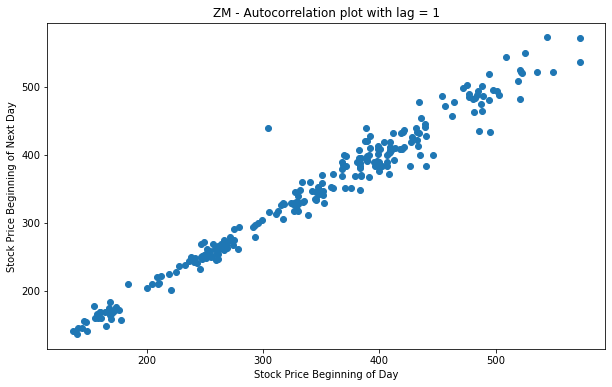

In [2]:
plt.figure(figsize=(10,6))
lag_plot(zmdata['Open'], lag = 1)
plt.title('ZM - Autocorrelation plot with lag = 1')
plt.xlabel("Stock Price Beginning of Day")
plt.ylabel("Stock Price Beginning of Next Day")
plt.show()

In the code block below we plot Zoom stock adjusted close price from 4/22/2020 - 4/21/2021. The adjusted close price let us obtained the closed price of the stock taking into account everything that might had affected the price after the stock market closed such as stock splits, dividends, etc. 

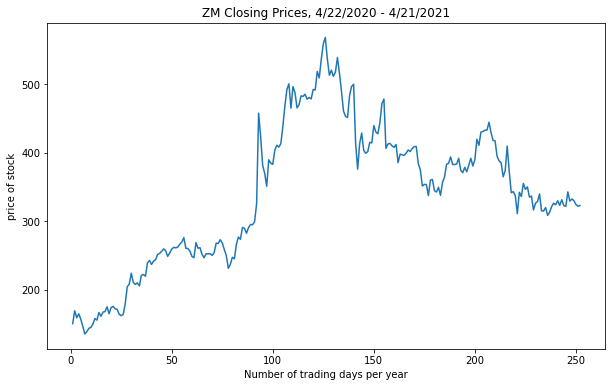

In [3]:
#pull values only from adj close column
adj_close = zmdata['Adj Close']

#create array of same length for time values
time = np.linspace(1, len(adj_close), len(adj_close))

# plots adj close prices with time, 252 days total
plt.figure(figsize=(10,6))
plt.plot(time, adj_close)
plt.title('ZM Closing Prices, 4/22/2020 - 4/21/2021')
plt.xlabel("Number of trading days per year")
plt.ylabel("price of stock")
plt.show()

Notice that in the plot above, the price behavior of Zoom shows the same behavior as the stochastic process of Brownian Motion.[2]

In the code block below we are creating a function for the Brownian Motion of the model. We also generated Brownian increments by multiplying a standard random variable from a normal distribution, N(0,1) by the square root of our time increment. The cumulative sum of these increments is the discretized Brownian Motion [10]. To generate any Geometric Brownian Motion model, we must pick a seed. The seed is used to set an initial starting sequence for any random number generator.[1] We could pick any seed to generate a model. At first we tried one just to create a plot to see. Then we tried a couple different seeds and came to the hypothesis that even though these seeds were not accurate, we could possibly find an accurate solution by cycling seed numbers.



In [4]:

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b


#### Geometric Brownian Motion

Parameters for the Geometric Brownian Motion model:

1. $S_{o}$ is the initial value price of the Geometric Brownian Motion      
2. $\mu$ (drift coefficient)represents the growth rate which in this case is the mean of returns over a given period of time. If the drift coefficient is positve over a period of time, the trend is going up and if it is negative, the trend is going down.       
3. $\sigma$ (diffusion coefficient) which is the volatility of the stock market price is always positive as it relates to the standard deviation of the spread distribution. $\sigma$, in this model, represents the standard deviation of those same returns over the same time.
4. "T" stands for the period of time for the data set utilized in this model (252 days)

In the code below, we are using the entire 252 day trading year to compute $\mu$ & $\sigma$.

In [5]:
def daily_return(adj_close):
    returns = []
    xrange = range 
    for i in xrange(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)

mu = np.mean(returns)*252.           # drift coefficient using mean from numpy * ~252 trading days per year)
sigma = np.std(returns)*np.sqrt(252.)  # diffusion coefficient using std from numpy
print ('mu:',mu,'sigma:',sigma,'Num of days considered:',len(adj_close))

mu: 1.0713725511062457 sigma: 0.7976006613435355 Num of days considered: 252


We now use the accepted closed form solution to the Geometric Brownian Motion to model our Zoom stock data. We created a function to implement our Geometric Brownian Motion exact solution using the initial stock adjusted price.[10]

From the printed plot below we have observed that our Geometric Brownian Motion model is not very accurate and needs adjustments. Either the seed number used to generate the Brownian Increments or $\mu$ and $\sigma$ need to be adjusted or both, we will explore these options more in later sections.

### Parameters
 So:     initial stock price     
 mu:     returns (drift coefficient)    
 sigma:  volatility (diffusion coefficient)    
 W:      brownian motion    
 T:      time period    
 N:      number of increments    


In [6]:

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,int(N+1))
    S = []
    S.append(So)
    xrange = range
    for i in xrange(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

N = 251
seed = 6                    # Random Seed
So = adj_close[0]           # Initial ZM stock price (04/22/2020)
W = Brownian(seed, N)[0]
T = 1.
soln = GBM(So, mu, sigma, W, T, N)[0]   # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]    # time increments for  plotting


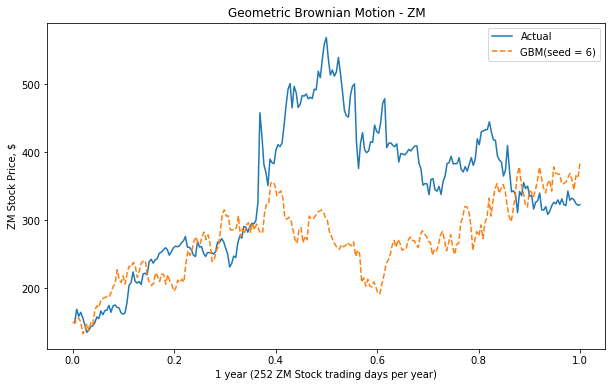

In [7]:
# compare model to actual Zoom stock data
# move time from days to 1 market year
# adjusting the original time array from days to years

time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.figure(figsize=(10,6))
plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM(seed = 6)', ls='--')
plt.ylabel('ZM Stock Price, $')
plt.xlabel('1 year (252 ZM Stock trading days per year)')
plt.title('Geometric Brownian Motion - ZM')
plt.legend(loc = 'upper right')
plt.show()

Below we compare models with different seeds and compare them to the actual motion of the Zoom stock. Notice that each seed yields a different hypothetical path.  They are still not very accurate but we are moving closer to a more accurate model.  We also adjust the time array from days to years.  If we kept it in days our smallest time step would be 1 as the stock closing price changes each day.  By moving the array to 1 year we can have time steps $<1$, which further down will increase the accuracy of our yet to be implemented Euler-Maruyama Method. We are trading fast computational time for accuracy by doing this.



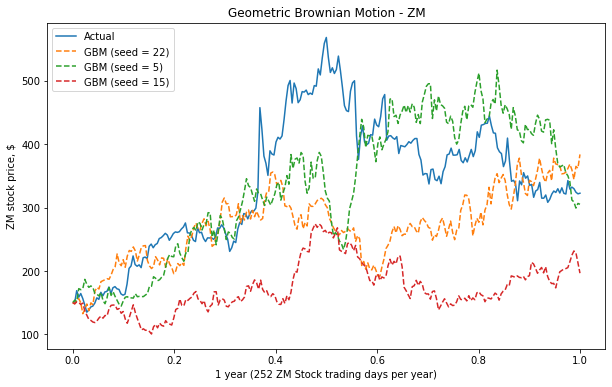

In [8]:
T = 1.
N = 251
So = adj_close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sigma, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sigma, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.figure(figsize=(10,6))
plt.plot(time, adj_close, label = 'Actual')
plt.xlabel('1 year (252 ZM Stock trading days per year)')
plt.ylabel('ZM stock price, $')
plt.title('Geometric Brownian Motion - ZM')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 15)', ls = '--')

plt.legend(loc = 'upper left')
plt.show()

#### Euler-Maruyama Method

We will use the Euler-Maruyama(EM) Method to approximate our Geometric Brownian Motion because the closed form solution may not always be determined.  EM is a recursive method where we obtain future data from the previous data point.[2]

Euler-Maruyama is an extension of Euler's Method(E) which is used to solve ordinary differential equations.  EM allows us to account for the Brownian motion in stochastic differential equations, such as the one we are using as our model. EM is the simplest method for solving stochastic differential equations.[4] We are starting with a simple method because we want to make sure our process works before trying something more complex. 

For our stochastic differential equation:
$dS = \mu S dt + \sigma S dW_t $

The EM scheme is given by:

E $\rightarrow$ $X_{i+1} = X_{i} + a(X_i) \Delta t$

EM $\rightarrow$ $X_{i+1} = X_{i} + \mu(X_i) \Delta t + \sigma(t_{i}) (W_{i+1}-W_{i}))$

dt = 1/number of trade days -> 0.00398

We will first run the method with the same calculated $\mu$ & $\sigma$ from above.


Notations for Euler-Maruyama numerical method
- $w_{i}$ is the brownian motion for the current days stock 
- $w_{i+1}$ is the brownian motion for the current next days stock 
- $X_{i}$ is the adjusted closing ZM stock price for the current day
- $X_{i+1}$ is the adjusted closing ZM stock price for the current day

- $\sigma(t_{i}) (W_{i+1}-W_{i}))$ accounts for the additive noise but not multiplicative noise as $\sigma$ is a function of only time, however, in our model $\mu$ & $\sigma$ are constant.


In [9]:
# Defining the Euler Maruyama Approximation:
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt

In [10]:
# Turn Data fram row into array for MSE calculation
adj_close_array = adj_close.to_numpy()

# Reset soln with orignal seed as we changed W above to show different GMB models 
seed = 6
So = adj_close[0]            # Initial Zoom stock price (04-22-2020)
W = Brownian(seed, N)[0]     # Brownian Motion array
T = 1.
N = 251
soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

# Time step -> dt = 0.00398
# EM using Brownian motion seed 6
b = Brownian(seed, N)[1]# Brownian increments
M = 1
L = N/M
EM_approx_1 = EM(So, mu, sigma, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,int(L+1))


### Plotting models and showing resultant Mean Absolute Error (MAE)

Mean Absolute Error is the average of absolute errors of our approximation to the observed values of ZM stock. We chose to use this error measurement instead of Root Mean Squared Error because of the random behavior of stock prices and the high possibility of outliers.  Root Mean Squared Error is much more sensitive to outliers than Mean Absolute Error.[7]

Acutal & GBM seed = 6, MAE: 84.43676106836763

GBM & EM using Brownian dt = 0.00398, MAE: 2.6284154680072205


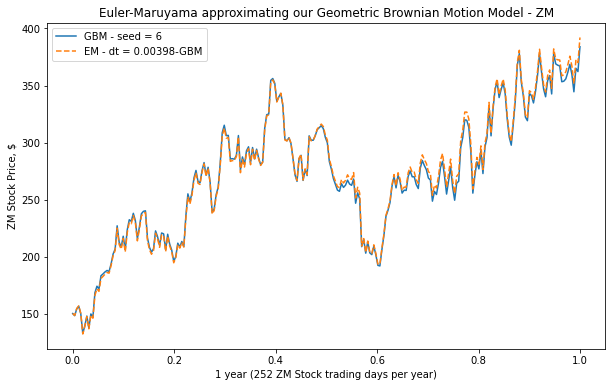

In [11]:
# This plot is showing the comparison between GBM with seed 6 and EM approximating it
plt.figure(figsize=(10,6))
plt.plot(t, soln, label ='GBM - seed = 6')
plt.plot(time_EM_1, EM_approx_1, label = 'EM - dt = 0.00398-GBM', ls ='--')
plt.ylabel('ZM Stock Price, $')
plt.xlabel('1 year (252 ZM Stock trading days per year)')
plt.title('Euler-Maruyama approximating our Geometric Brownian Motion Model - ZM')
plt.legend(loc = 'upper left')

print('Acutal & GBM seed = 6, MAE:',mean_absolute_error(adj_close_array, EM_approx_1))
print('\nGBM & EM using Brownian dt = 0.00398, MAE:',mean_absolute_error(soln, EM_approx_1))

From the plot above we can see that our implementation of Euler-Maruyama is well approximating our Geometric Brownian Motion Model by calculating the MAE of our approximation to the actual solution. In the code below we run a for loop 100,000 times containing our Euler-Maruyama implementation, changing the seed with each iteration.  We will also calculate the Mean Absolute Error to a certain tolerance (Epsilon) of our choosing, in order to find the best seed value.

seed num: 26874
MAE: 34.71845734098868
seed num: 96362
MAE: 33.30354828648945
Our average MAE for all models:= 164.89274322008228 



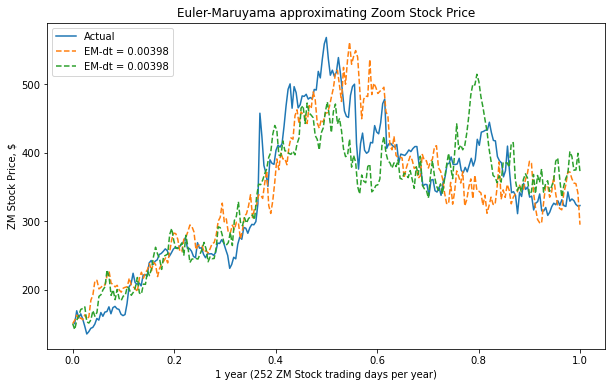

In [12]:
plt.figure(figsize=(10,6))
plt.plot(time, adj_close, label = 'Actual')
errorAR = []
# Turn Data from row into array for MSE calculation
adj_close_array = adj_close.to_numpy()
for z in range(100000):
    
    seed = z
    b = Brownian(seed, N)[1]# Brownian increments 
    M = 1                    
    L = N/M
    EM_approx_1 = EM(So, mu, sigma, b, T, N, M)[0]
    time_EM_1 = np.linspace(0.,1.,int(L+1)) 

    if (mean_absolute_error(adj_close_array, EM_approx_1)) < 35:
        plt.plot(time_EM_1, EM_approx_1, label = 'EM-dt = 0.00398', ls ='--')
        print('seed num:',z)
        print('MAE:',(mean_absolute_error(adj_close_array, EM_approx_1)))
    errorAR.append(mean_absolute_error(adj_close_array, EM_approx_1))

plt.title('Euler-Maruyama approximating Zoom Stock Price')
plt.ylabel('ZM Stock Price, $')
plt.xlabel('1 year (252 ZM Stock trading days per year)')
plt.legend(loc = 'upper left')

print('Our average MAE for all models:=',np.average(errorAR),'\n')

 As seen above, even with 100,000 different seeds, the $\mu$ and $\sigma$ from the enitre year were not the most accurate. As an attempt to improve our model, we went on to calculating new $\mu$'s and $\sigma$'s by implementing train/test splits of the adj_cost array. In the next segment, we implement this training and test data splitting. We chose to try training splits in increments of 20% of the total data. For first split we use 20% of data and continuing to 100% of data as training data. As we only want to predict future prices of a stock, we used the whole year as test data with each iteration.  

Training split: 0.2 mu 0.6129148202502545 sigma 0.3315494923727382
Our average MAE for all models: 137.94757362531516 




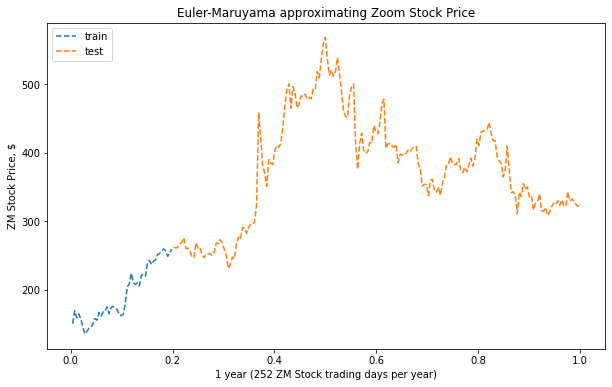

Training split: 0.4 mu 1.1107343985520122 sigma 0.598803272272669

Seed num: 8957
MAE: 34.14331130220833

Seed num: 44082
MAE: 31.594251673570348

Seed num: 61051
MAE: 34.8276816348341

Seed num: 63184
MAE: 33.00249540849834

Seed num: 66161
MAE: 30.683475926885343

Seed num: 76266
MAE: 34.48752013132149

Seed num: 76665
MAE: 34.16177663740767
Our average MAE for all models: 138.8426366684649 




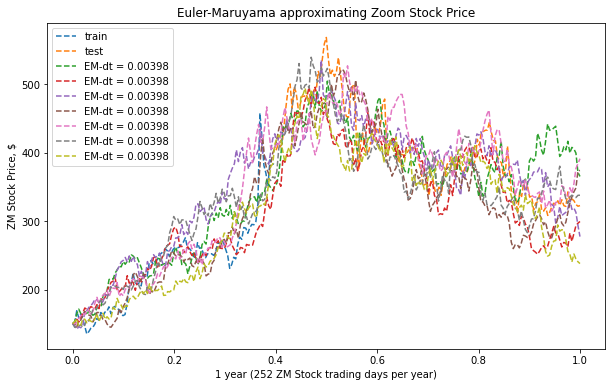

Training split: 0.6 mu 1.284634523953737 sigma 0.6901644185844875

Seed num: 26467
MAE: 33.017745433363956

Seed num: 31279
MAE: 30.111582433073366

Seed num: 40158
MAE: 34.50296817412876

Seed num: 42352
MAE: 32.825124986308936

Seed num: 44082
MAE: 34.58489734743593

Seed num: 76868
MAE: 34.29457092741231
Our average MAE for all models: 154.65567019622983 




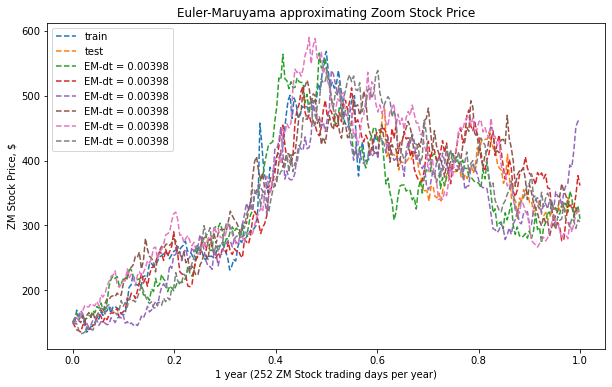

Training split: 0.8 mu 1.294948738665953 sigma 0.7423910343353686

Seed num: 20093
MAE: 34.47563308695226

Seed num: 31279
MAE: 29.891289539882777

Seed num: 40158
MAE: 34.56278657653526

Seed num: 42352
MAE: 34.482670144708635

Seed num: 73285
MAE: 34.90346483552444
Our average MAE for all models: 162.71545776757878 




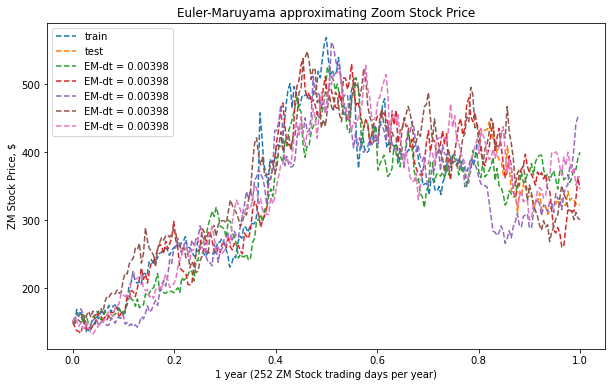

Training split: 1.0 mu 1.0713725511062457 sigma 0.7976006613435355

Seed num: 26874
MAE: 34.71845734098868

Seed num: 96362
MAE: 33.30354828648945
Our average MAE for all models: 164.89274322008228 




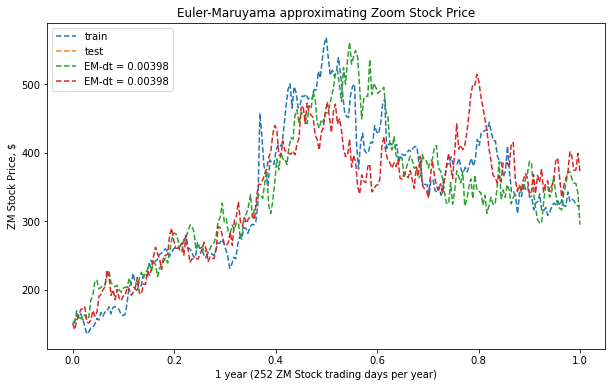

In [13]:
# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

# Turn Data fram row into array for MAE calculation
adj_close_array = adj_close.to_numpy()
        
for zz in range(5):
    test = []
    train = []
    split = (2*(zz+1))/10
    
    for q in range(len(adj_close)):
    
        if q <= (int(len(adj_close)*split)-1):
            train.append(adj_close[q])
        else: 
            test.append(adj_close[q])  
    returns = daily_return(train)
    
    mu = np.mean(returns)*len(train)           # drift coefficient using mean from numpy * ~252 trading days per year)
    sigma = np.std(returns)*np.sqrt(len(train))  # diffusion coefficient using std from numpy
    print ('Training split:', split,'mu',mu,'sigma',sigma)
    
    # split time into two yearly adjusted split times 
    split_list = [int(len(time)*split)]
    # using list comprehension + zip()
    # to perform custom list split
    res = [time[i : j] for i, j in zip([0] + 
              split_list, split_list + [None])]
    time2 = res[0]
    time3 = res[1]

    plt.figure(figsize=(10,6))
    plt.plot(time2, train, label = 'train', ls ='--')
    plt.plot(time3, test, label = 'test', ls ='--')

    errorAR = []  # store MAE of each model

    for z in range(100000):

        # Reset soln with orignal seed as we changed W above to show different GMB models 
        seed = z
        So = train[0]            # Initial Zoom stock price (04-22-2020)
        T = 1.
        N = len(adj_close)-1
        # Time step -> dt = 0.00398
        # EM using Brownian motion 
        b = Brownian(seed, N)[1] # Brownian increments 
        M = 1
        L = N/M
        EM_approx_1 = EM(So, mu, sigma, b, T, N, M)[0]
        time_EM_1 = np.linspace(0.,1.,int(L+1))


        if (mean_absolute_error(adj_close_array, EM_approx_1)) < 35:
            plt.plot(time_EM_1, EM_approx_1, label = 'EM-dt = 0.00398', ls ='--')
            print('\nSeed num:',z)
            print('MAE:',(mean_absolute_error(adj_close_array, EM_approx_1)))
        errorAR.append(mean_absolute_error(adj_close_array, EM_approx_1))

    print('Our average MAE for all models:',np.average(errorAR),'\n\n')
    plt.title('Euler-Maruyama approximating Zoom Stock Price')
    plt.ylabel('ZM Stock Price, $')
    plt.xlabel('1 year (252 ZM Stock trading days per year)')
    plt.legend(loc = 'upper left')
    plt.show()

Results from our implementation of train/test splits are the following:       
1. Training split: 0.2 = 20% of the data

    $\rightarrow$ $\mu$ 0.6129148202502542 and $\sigma$ 0.3315494923727381
    
    $\rightarrow$ Our average MAE for all models: 137.94757362531516

2. Training split: 0.4 = 40% of the data

    $\rightarrow$ $\mu$ 1.1107343985520122 and $\sigma$ 0.5988032722726687

    $\rightarrow$ seed num: 8957
    $\rightarrow$ MAE: 34.14331130220833

    $\rightarrow$ seed num: 44082
    $\rightarrow$ MAE: 31.594251673570348

    $\rightarrow$ seed num: 61051
    $\rightarrow$ MAE: 34.8276816348341

    $\rightarrow$ seed num: 63184
    $\rightarrow$ MAE: 33.00249540849834

    $\rightarrow$ seed num: 66161
    $\rightarrow$ MAE: 30.683475926885343

    $\rightarrow$ seed num: 76266
    $\rightarrow$ MAE: 34.48752013132149

    $\rightarrow$ seed num: 76665
    $\rightarrow$ MAE: 34.16177663740767

    $\rightarrow$ Our average MAE for all models: 138.8426366684649

3. Training split: 0.6 = 60% of the data

    $\rightarrow$ $\mu$ 1.2846345239537376 and $\sigma$ 0.6901644185844875

    $\rightarrow$ seed num: 26467
    $\rightarrow$ MAE: 33.017745433363956

    $\rightarrow$ seed num: 31279
    $\rightarrow$ MAE: 30.111582433073366

    $\rightarrow$ seed num: 40158
    $\rightarrow$ MAE: 34.50296817412876

    $\rightarrow$ seed num: 42352
    $\rightarrow$ MAE: 32.825124986308936

    $\rightarrow$ seed num: 44082
    $\rightarrow$ MAE: 34.58489734743593

    $\rightarrow$ seed num: 76868
    $\rightarrow$ MAE: 34.29457092741231

    $\rightarrow$ Our average MAE for all models: 154.65567019622983


4. Training split: 0.8 = 80% of the data

    $\rightarrow$ $\mu$ 1.294948738665953 and $\sigma$ 0.7423910343353683

    $\rightarrow$ seed num: 20093
    $\rightarrow$ MAE: 34.47563308695226

    $\rightarrow$ seed num: 31279
    $\rightarrow$ MAE: 29.891289539882777

    $\rightarrow$ seed num: 40158
    $\rightarrow$ MAE: 34.56278657653526
    
    $\rightarrow$ seed num: 42352
    $\rightarrow$ MAE: 34.482670144708635

    $\rightarrow$ seed num: 73285
    $\rightarrow$ MAE: 34.90346483552444
    
    $\rightarrow$ Our average MAE for all models: 162.71545776757878


5. Training split: 1.0 = 100% of the data

    $\rightarrow$ $\mu$ 1.071372551106246 and $\sigma$ 0.7976006613435352
    
    $\rightarrow$ seed num: 26874
    $\rightarrow$ MAE: 34.71845734098868
    
    $\rightarrow$ seed num: 96362
    $\rightarrow$ MAE: 33.30354828648945

    $\rightarrow$ Our average MAE for all models: 164.89274322008228 


From the plots above, we can use some data analysis and see that our most accurate model comes when we calculate $\mu$ and $\sigma$ while using 80% of the data as training data and with a seed of 31279. This model produced a MAE of 29.891289539882777, which was the lowest MAE we could find while using 100,000 iterations and a max MAE allowed less than 35. Note that the value for MAE will be different every time the data is run for every 100,000 iterations. We could most likely find a more accurate model if we upped our iterations even further. However, this program already takes a significant period of time to fully compute, which is a weak point in our implementation into Python. That being said, the strength of our model is that  turned out relatively accurate if you consider how simple it is by not including outside factors that effect stock prices.

In the code block below we will use the 31279 seed value that we found for 80% of the data as training data and plot it to show how well the model behaves. 

training split: 0.8 mu 1.294948738665953 sigma 0.7423910343353686


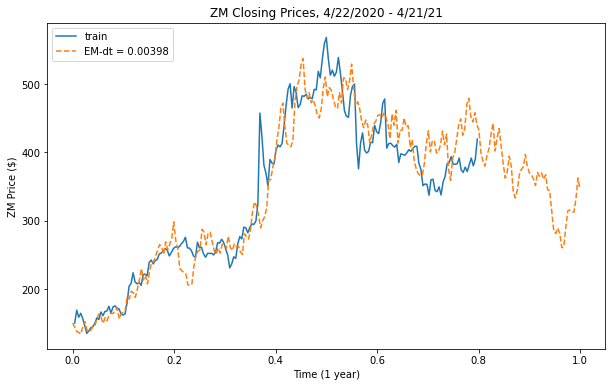

MAE: 29.891289539882777


In [14]:
# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

#pull values only from adj close column
adj_close = zmdata['Adj Close']
test = []
train = []
split = 0.8

for q in range(len(adj_close)):
    
    if q <= (int(len(adj_close)*split)-1):
        train.append(adj_close[q])
    else: 
        test.append(adj_close[q])  

#split time into two yearly adjusted split times 
split_list = [int(len(time)*split)]
# using list comprehension + zip()
# to perform custom list split
res = [time[i : j] for i, j in zip([0] + 
        split_list, split_list + [None])]
time2 = res[0]
time3 = res[1]


returns = daily_return(train)    
mu = np.mean(returns)*len(train)           # drift coefficient using mean from numpy * ~252 trading days per year)
sigma = np.std(returns)*np.sqrt(len(train))  # diffusion coefficient using std from numpy
print ('training split:', split,'mu',mu,'sigma',sigma)


# Time step - dt = 0.03125
# EM using Brownian motion 
seed = 31279
So = train[0]
T = 1.
N = len(adj_close)-1
b = Brownian(seed, N)[1] # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sigma, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,int(L+1))

plt.figure(figsize=(10,6))
plt.plot(time2, train, label = 'train')
plt.plot(time_EM_1, EM_approx_1, label = 'EM-dt = 0.00398',ls='--')
plt.title('ZM Closing Prices, 4/22/2020 - 4/21/21')
plt.xlabel("Time (1 year)")
plt.ylabel("ZM Price ($)")
plt.legend(loc = 'upper left')
plt.show()

print('MAE:',(mean_absolute_error(adj_close_array, EM_approx_1)))


From our final results in the plot above we have found a seed number, $\mu$ and $\sigma$, such that our model is as accurate as possible given the numerical method we chose to implement and the computing power available to us.  We can see that while we made great progress in improving this model it is still not perfect. Some shortcomings in our Geometric Brownian model were due to the fact that we chose to treat $\mu$, the drift coefficient, and $\sigma$, the diffusion coefficient, as constants.  In the real world these values would change over time as the stock environment changes day to day. The implementation of brownian motion was integrated well with our stochastic differential equation. The plotted graphs show that the brownian motion remained finite. This makes sense because ultimately the share price of a stock cannot go zooming by to infinity.



## 5. Conclusion (individual)
When our group first started this project, we had ambitions of possibly implementing a stock model with included influence from Covid-19 vaccination numbers. We quickly realized the endless possibilities of influences on stocks would make it nearly impossible to input Covid-19 vaccination numbers as viable influence on our actual model. So we applied a similar approach as many others, by creating a Brownian motion model of our stock and then approximating the numerical solution of a stochastic differential equation. There is many possible approaches to this but we chose the one we felt we understood best, the Euler-Maruyama method. During testing, my group could see the weaknesses in approximating random motion quickly. With each new seed we input for a model, we would get another random result. Even though our models were behaving similar to the true behavior of the Zoom stock, this does not mean our models were right. In the future, I would love to try a linear regression approach. Where the values of the stock is our target variable. We call this ytrue. For our model we are creating a variable called ypred. ypred = B0 + B1X1 + …. + BnXn. Where Xn values are our variables chosen for the model, Bn values are our intercept and coefficients for these variables, and n is the total number of variables. I think with this approach we could use variables such as size of stock(shares available), market share, market influence, and many others, including our Covid-19 vaccine numbers. We could have then done thorough testing to see which combination of variables would create the best model. This approach can also have the train/test splitting done to it so I think it would work great. However, I still think this approach would have major shortcomings as most stock predictions do. Through this project I have learned how difficult it can be to accurately model a stock and why this seems to be a billion-dollar question still waiting to be solved. In fact, companies have been researching and investing for years on how to accurately predict the future of a stock. As we can see and I think conclude to, stocks are random, always have been, and always will be, and as stock prices are determined by human interactions in the grand scheme of things, I don't know if stocks will ever be fully predictable as human behavior is unpredictable.  

## 6. References

1. Bansal, J. (2020, November 27). How to use random seeds effectively. Retrieved April 29, 2021, from             https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79
2. Carvalho, C. (2021, April 20). Stochastic Differential Equations. Lecture presented at Math 150 - Spring         2021 in University of California, Merced, Merced.
3. Dmouj, A. (2006, November). Stock price modelling: Theory and Practice. Retrieved May 7, 2021, from
      https://beta.vu.nl/nl/Images/werkstuk-dmouj_tcm235-91341.pdf
4. Euler–maruyama method. (2021, March 28). Retrieved May 08, 2021, from                                           https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
5. Hellard, B. (2020, September 01). Zoom revenues up 355% in second quarter of 2020. Retrieved April 29,           2021, from https://www.itpro.co.uk/software/video-conferencing/356925/zoom-revenues-up-355-in-second-         quarter-of-2020
6. Loukas, S. (2021, March 01). Time-series forecasting: Predicting stock prices using an arima model.             Retrieved April 29, 2021, from https://towardsdatascience.com/time-series-forecasting-predicting-stock-       prices-using-an-arima-model-2e3b3080bd70
7. Mean absolute error. (2021, February 13). Retrieved May 08, 2021, from                                           https://en.wikipedia.org/wiki/Mean_absolute_error
8. Software, Statistical. “Lag Plot.” NCSS Statistical Software, 2021.
9. Stock market. (2021, April 23). Retrieved April 29, 2021, from https://en.wikipedia.org/wiki/Stock_market
10. Sullivan, J. (2017, September 21). Stochastic calculus with python: Simulating stock price dynamics.           Retrieved April 29, 2021, from https://jtsulliv.github.io/stock-movement/
11. Yahoo Finance - Stock Market Live, Quotes, Business & Finance News. Retrieved April 22, 2021, from
    https://finance.yahoo.com/





